# Data Science Group Project - Predicting Financial Fraud


### Importing libraries

In [74]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

### Importing Data

In [75]:
rawdataID = pd.read_csv("train_identity.csv")

In [76]:
rawdataT = pd.read_csv("train_transaction.csv")

More dataframes so we do not need to read the files in every time we make a mistake.

In [77]:
dataID = rawdataID
dataT = rawdataT

# Cleaning the Transaction Data

There are obviously far too many features to go through each and every column. Thankfully there are collections of columns that have the same structure and theme, these can be dealt with simulatiously.

We will print the shape of the data as we go along to see how much data we lose when cleaning

In [78]:
print(dataT.shape)

(590540, 394)


### Time column
The first useful feature is TransactionDT, which is the amount of time in seconds since the first transaction in the table (+ 1 day). This seems to be a useful metric but the time of day the transaction occured may also be a useful metric, which can be calculated from TransactionDT by noting that each day has 86400 seconds.

In [79]:
dataT["ModTransactionDT"]=dataT["TransactionDT"]%86400
dataT

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V331,V332,V333,V334,V335,V336,V337,V338,V339,ModTransactionDT
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86247
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86249
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86279
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86288


### Card Columns 

Now look at the percentage of missing NaNs in the card columns.

In [80]:
dataT[["card1","card2","card3","card4","card5","card6"]]

,card1,card2,card3,card4,card5,card6
0,13926,NaN,150.0,discover,142.0,credit
1,2755,404.0,150.0,mastercard,102.0,credit
2,4663,490.0,150.0,visa,166.0,debit
3,18132,567.0,150.0,mastercard,117.0,debit
4,4497,514.0,150.0,mastercard,102.0,credit
...,...,...,...,...,...,...
590535,6550,NaN,150.0,visa,226.0,debit
590536,10444,225.0,150.0,mastercard,224.0,debit
590537,12037,595.0,150.0,mastercard,224.0,debit
590538,7826,481.0,150.0,mastercard,224.0,debit


In [81]:
percent_missing = (dataT[["card1","card2","card3","card4","card5","card6"]].isnull().sum()/len(dataT))*100
percent_missing

card1    0.000000
card2    1.512683
card3    0.265012
card4    0.267044
card5    0.721204
card6    0.266028
dtype: float64

The proportion of Nans in the card columns is small. This coupled with the fact that many of these features (such as card1) are difficult to impute, we can remove rows containing NaNs without significant loss of data.

In [82]:
dataT = dataT.dropna(subset=["card1","card2","card3","card4","card5","card6"])

In [83]:
dataT

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V331,V332,V333,V334,V335,V336,V337,V338,V339,ModTransactionDT
1,2987001,0,86401,29.000,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2987002,0,86469,59.000,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69
3,2987003,0,86499,50.000,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99
4,2987004,0,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106
5,2987005,0,86510,49.000,W,5937,555.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590534,3577534,0,15811030,67.505,C,5812,408.0,185.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86230
590536,3577536,0,15811049,39.500,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86249
590537,3577537,0,15811079,30.950,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86279
590538,3577538,0,15811088,117.000,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86288


### Address Columns

We believe that 'addr1' and 'addr2' refer to the billing region and billing country respectively, but this is not confirmed by Vesta.

In [84]:
percent_missing = (dataT[["addr1","addr2"]].isnull().sum()/len(dataT))*100
percent_missing

addr1    11.19072
addr2    11.19072
dtype: float64

Both have significant proportion of NaN values, so we need to find a reasonable way to impute the data.

#### addr1

In [85]:
print('Percentage of column made up by each value in addr1')
dataT["addr1"].fillna("nan").value_counts()/len(dataT)

Percentage of column made up by each value in addr1


nan      0.111907
299.0    0.078727
325.0    0.073003
204.0    0.071048
264.0    0.066269
           ...   
488.0    0.000002
323.0    0.000002
187.0    0.000002
178.0    0.000002
245.0    0.000002
Name: addr1, Length: 330, dtype: float64

The data is quite sparsely distributed between the different regions, so we cannot assign missing data to a common area.

In [86]:
addr1Fraud = dataT[["isFraud","addr1"]].fillna('nan').value_counts()
print('Percentage of transactions that are fruadulant when there is no data in addr1:')
print(np.round(addr1Fraud[1][0]/(addr1Fraud[1][0] + addr1Fraud[0][0]) * 100, decimals=2), '%')

Percentage of transactions that are fruadulant when there is no data in addr1:
11.54 %


Compared to the baseline of about 3% this is a significant correlation, which implies strong predicitve capabilities. For this reason the NaNs will be imputed as 'nan' so that the model can use the lack of data as a predicitve indicator.

#### addr2

In [87]:
print('Percentage of column made up by each value in addr1')
dataT["addr2"].fillna("nan").value_counts()/len(dataT)

Percentage of column made up by each value in addr1


87.0    0.880674
nan     0.111907
60.0    0.005249
96.0    0.001096
32.0    0.000157
          ...   
25.0    0.000002
22.0    0.000002
15.0    0.000002
35.0    0.000002
93.0    0.000002
Name: addr2, Length: 74, dtype: float64

In [88]:
dataT[["isFraud","addr2"]].fillna('nan').value_counts().head(4)

isFraud  addr2
0        87.0     498195
         nan       57367
1        87.0      12154
         nan        7483
dtype: int64

88% of addr2 has a value of 87.0, therefore it would be reasonable to impute any nans in the column with this value. However as can be seen in the output above almost 12% of transactions missing data in addr2 are fraudulant. This, like with addr1, implies strong predicitve capabilities from the missing data.

For both address columns we will impute the NaNs as 'nan' and one-hot encode the data as they refer to catagorical information, not continuous numerical data as the model will likely assume.

In [89]:
dataT[["addr1","addr2"]] = dataT[["addr1","addr2"]].fillna('nan')

/Users/ferguswilliams/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


### Distance Columns

Look at percentage NaNs in each column

In [90]:
percent_missing = (dataT[["dist1","dist2"]].isnull().sum()/len(dataT))*100
percent_missing

dist1    59.664917
dist2    93.555974
dtype: float64

In [91]:
dataT[['isFraud','dist2']].fillna('nan').value_counts()

isFraud  dist2 
0        nan       525726
1        nan        16429
0        7.0         5176
         0.0         2957
         1.0         1174
                    ...  
         1955.0         1
         1956.0         1
         1957.0         1
         1965.0         1
         1285.0         1
Length: 2058, dtype: int64

In [92]:
16429/(16429+525726)

0.030303142090361612

The amount of missing values in the distance columns is considered too large for imputation, these columns will be removed from the dataframe.

In [93]:
dataT=dataT.drop(columns=["dist1","dist2"])

# Email Columns 

In [94]:
percent_missing = (dataT[["P_emaildomain","R_emaildomain"]].isnull().sum()/len(dataT))*100
percent_missing

P_emaildomain    15.996259
R_emaildomain    76.605096
dtype: float64

In [95]:
dataT[["isFraud","R_emaildomain"]].fillna('nan').value_counts().head(20)

isFraud  R_emaildomain
0        nan              434754
         gmail.com         49712
         hotmail.com       25160
         anonymous.com     19679
         yahoo.com         11142
1        nan                9171
         gmail.com          6734
0        aol.com            3531
1        hotmail.com        2107
0        outlook.com        2075
         comcast.net        1780
         yahoo.com.mx       1481
         icloud.com         1208
         msn.com             836
         live.com            716
         live.com.mx         706
         verizon.net         616
1        yahoo.com           604
0        me.com              543
         sbcglobal.net       543
dtype: int64

As can be seen in the above output, 2% of rows with NaNs in R_ are classified as fraud. However 7.4% of rows with gmail being the email domain are classified as fraud. This implies that there is ample predicitve capabilities in this column, even with the majority of the column having no data.

By replaceing all NaNs with a string ('nan') this can then be one-hot encoded as its own email domain.

In [96]:
dataT[["P_emaildomain","R_emaildomain"]]=dataT[["P_emaildomain","R_emaildomain"]].fillna(value="nan")

# C - Columns

The 'C' stands for counting, however the specific meaning of all the features are hidden.

Look at NaNs in C-Columns.

In [97]:
for i in range(1,15):
    print(dataT['C'+str(i)].isna().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0


There are no NaNs in these columns, so they are suitable for use in the model without any imputation required.

In [98]:
dataT[['C'+str(i) for i in range(1,15)]]

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
3,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
5,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590534,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
590536,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
590537,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
590538,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,1.0,1.0,5.0,1.0


All the C columns are in numerical format so there is no need to one-hot encode these features.

# D - Columns

The columns that start with D refer to time metrics, a potentially crucial set of features. Unfortunately lots of these columns contain too many NaN values with no clear way to impute.

In [99]:
per=[]
print('Percentage of NaNs in each feature:')
for i in range(1,16):
    percent_missing=dataT['D'+str(i)].isna().sum()/len(dataT)*100
    per.append(percent_missing)
    print(np.round(percent_missing, decimals=2), '%')

Percentage of NaNs in each feature:
0.22 %
47.43 %
44.42 %
28.7 %
52.48 %
87.54 %
93.37 %
87.19 %
87.19 %
12.97 %
47.4 %
88.98 %
89.42 %
89.38 %
15.21 %


In [100]:
dataT[['D'+str(i) for i in range(1,16)]]

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15
1,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0
2,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,315.0,NaN,NaN,NaN,315.0
3,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,84.0,NaN,NaN,NaN,NaN,111.0
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590534,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,0.0
590536,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0
590537,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0
590538,22.0,22.0,0.0,22.0,0.0,NaN,NaN,NaN,NaN,22.0,22.0,NaN,NaN,NaN,22.0


Any rows with more than 40% Nan values will be dropped from the dataframe, as these contain too much missing data to contribute significant predicitve performance. The remaining missing values in the distance columns will be imputed with the column median as they are all numeric features.

In [101]:
d_head=[]
for i in range(1,16):
    if per[i-1]>40:
        dataT=dataT.drop(columns="D"+str(i))
    else:
        d_head.append("D"+str(i))       
dataT[d_head]=dataT[d_head].fillna(0)

# M - Columns

These columns represent matches between details with the card, hence missing values could very well play an important role in determing fraud.

In [102]:
print('Percentage of NaNs in each feature:')
per=[]
for i in range(1,10):
    percent_missing=dataT['M'+str(i)].isna().sum()/len(dataT)*100
    per.append(percent_missing)
    print(np.round(percent_missing, decimals=2), '%')

Percentage of NaNs in each feature:
46.0 %
46.0 %
46.0 %
47.64 %
59.4 %
28.85 %
58.7 %
58.69 %
58.69 %


There is a large amount of missing data in these features, fortunately they are catagorial features with a simple imputation solution, lets look at an example column:

In [103]:
dataT[['isFraud','M1']].fillna('nan').value_counts()

isFraud  M1 
0        T      306730
         nan    252670
1        nan     13896
         T        6177
0        F          25
dtype: int64

From this output we can show that in rows where M1 has the value 'T' fraud occurs < 2% of the time, however in rows with no entry for M1 fraud occurs > 3% of the time. These findings are collaborated throughout the rest of the M-columns meaning that the lack of data tells us as much information as the data itself. For this reason the NaNs will be replaced with a string that can be one-hot encoded.

In [104]:
d_list=[]
for i in range(1,10):
    d_list.append("M"+str(i))
dataT[d_list]=dataT[d_list].fillna(value="nan")

# V - Columns

There are 339 features under the V umberella. They are engineered by Vesta and contain a large variety of data that could be helpful for predicting fraud.

There are many of these features that have too much missing data and no obvious way to impute, so V Columns with more than 50% Nan values are dropped and the remaining missing values are imputed as -1 due to all the other data in these columns being positive. This allows the model to find potential trends occuring when no data is provided.

In [105]:
for i in range(1,340):
         if  dataT["V"+str(i)].isna().sum()/len(dataT)*100 > 50:
                dataT=dataT.drop(columns="V"+str(i))
         else:  
                dataT["V"+str(i)]=dataT["V"+str(i)].fillna(-1)

In [106]:
dataT

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V313,V314,V315,V316,V317,V318,V319,V320,V321,ModTransactionDT
1,2987001,0,86401,29.000,W,2755,404.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1
2,2987002,0,86469,59.000,W,4663,490.0,150.0,visa,166.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,69
3,2987003,0,86499,50.000,W,18132,567.0,150.0,mastercard,117.0,...,0.0,0.0,0.0,50.0,1404.0,790.0,0.000000,0.000000,0.000000,99
4,2987004,0,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,106
5,2987005,0,86510,49.000,W,5937,555.0,150.0,visa,226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590534,3577534,0,15811030,67.505,C,5812,408.0,185.0,mastercard,224.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,86230
590536,3577536,0,15811049,39.500,W,10444,225.0,150.0,mastercard,224.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,86249
590537,3577537,0,15811079,30.950,W,12037,595.0,150.0,mastercard,224.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,86279
590538,3577538,0,15811088,117.000,W,7826,481.0,150.0,mastercard,224.0,...,317.5,669.5,317.5,0.0,2234.0,0.0,0.000000,0.000000,0.000000,86288


one hot encode cleaned transaction data set.

In [107]:
dataT=pd.get_dummies(dataT)

In [108]:
dataT

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,C1,C2,...,M6_nan,M7_F,M7_T,M7_nan,M8_F,M8_T,M8_nan,M9_F,M9_T,M9_nan
1,2987001,0,86401,29.000,2755,404.0,150.0,102.0,1.0,1.0,...,0,0,0,1,0,0,1,0,0,1
2,2987002,0,86469,59.000,4663,490.0,150.0,166.0,1.0,1.0,...,0,1,0,0,1,0,0,1,0,0
3,2987003,0,86499,50.000,18132,567.0,150.0,117.0,2.0,5.0,...,0,0,0,1,0,0,1,0,0,1
4,2987004,0,86506,50.000,4497,514.0,150.0,102.0,1.0,1.0,...,1,0,0,1,0,0,1,0,0,1
5,2987005,0,86510,49.000,5937,555.0,150.0,226.0,1.0,1.0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590534,3577534,0,15811030,67.505,5812,408.0,185.0,224.0,1.0,1.0,...,1,0,0,1,0,0,1,0,0,1
590536,3577536,0,15811049,39.500,10444,225.0,150.0,224.0,1.0,1.0,...,0,1,0,0,1,0,0,1,0,0
590537,3577537,0,15811079,30.950,12037,595.0,150.0,224.0,1.0,1.0,...,0,0,0,1,0,0,1,0,0,1
590538,3577538,0,15811088,117.000,7826,481.0,150.0,224.0,1.0,1.0,...,0,0,0,1,0,0,1,0,0,1


# Cleaning ID Dataset

In [109]:
dataID

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,3577521,-15.0,145955.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 66.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,F3111 Build/33.3.A.1.97
144229,3577526,-5.0,172059.0,NaN,NaN,1.0,-5.0,NaN,NaN,NaN,...,chrome 55.0 for android,32.0,855x480,match_status:2,T,F,T,F,mobile,A574BL Build/NMF26F
144230,3577529,-20.0,632381.0,NaN,NaN,-1.0,-36.0,NaN,NaN,NaN,...,chrome 65.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,Moto E (4) Plus Build/NMA26.42-152
144231,3577531,-5.0,55528.0,0.0,0.0,0.0,-7.0,NaN,NaN,0.0,...,chrome 66.0,24.0,2560x1600,match_status:2,T,F,T,F,desktop,MacOS


In [110]:
print("The percentage of NaNs in each feature:")
percent_missing = dataID.isnull().sum()/len(dataID)*100
percent_missing

The percentage of NaNs in each feature:


TransactionID     0.000000
id_01             0.000000
id_02             2.330257
id_03            54.016071
id_04            54.016071
id_05             5.108401
id_06             5.108401
id_07            96.425922
id_08            96.425922
id_09            48.052110
id_10            48.052110
id_11             2.256765
id_12             0.000000
id_13            11.726165
id_14            44.503685
id_15             2.251912
id_16            10.325654
id_17             3.372321
id_18            68.722137
id_19             3.407681
id_20             3.447200
id_21            96.423149
id_22            96.416215
id_23            96.416215
id_24            96.708798
id_25            96.441868
id_26            96.420375
id_27            96.416215
id_28             2.256765
id_29             2.256765
id_30            46.222432
id_31             2.739318
id_32            46.207872
id_33            49.187079
id_34            46.056034
id_35             2.251912
id_36             2.251912
i

There is considerable proportion of missing values in some id columns. Any with 40% or more NAN values are removed from the dataframe.

In [111]:
for col in dataID.columns:
    if dataID[col].isnull().sum()/len(dataID)*100 > 40:
        dataID=dataID.drop(columns=col)

id_02 , fill Nan with -1.

In [112]:
dataID['id_02'].fillna('nan').value_counts()

nan         3361
1102.0        11
696.0         10
1120.0         9
1083.0         9
            ... 
11447.0        1
37550.0        1
24801.0        1
247735.0       1
55528.0        1
Name: id_02, Length: 115656, dtype: int64

As can be seen from the value counts the data is spread too sparse to send the nans to a median. Instead we will fill the nans with -1, as there are no negative values in this column so the model will have a chance at seperating missing values without us having to one-hot encode.

In [113]:
dataID["id_02"]=dataID["id_02"].fillna(-1)

In [114]:
dataID['id_05'].fillna('nan').value_counts()

0.0      92743
1.0       8293
nan       7368
2.0       4937
3.0       3854
         ...  
-35.0        1
-44.0        1
-46.0        1
-38.0        1
-39.0        1
Name: id_05, Length: 94, dtype: int64

The vast majority of data is 0.0, so it would be sensible to impute the NaNs as 0 too

In [115]:
dataID["id_05"]=dataID["id_05"].fillna(0)

id_06, fill nan 0.

In [116]:
dataID["id_06"]=dataID["id_06"].fillna(0)

In [117]:
dataID['id_11'].fillna('nan').value_counts()

100.0                133162
nan                    3255
95.08000183105467      1231
95.16000366210938       754
97.12000274658205       440
                      ...  
94.66999816894533         1
93.68000030517578         1
90.8499984741211          1
92.54000091552734         1
92.66000366210938         1
Name: id_11, Length: 366, dtype: int64

The vast majority of data is 100.0, so it would be sensible to impute the NaNs as 100 too

In [118]:
dataID["id_11"]=dataID["id_11"].fillna(100)

In [119]:
dataID["id_13"]=dataID["id_13"].fillna(-1) # one hot encode

In [120]:
dataID['id_15'].fillna('nan').value_counts()

Found      67728
New        61612
Unknown    11645
nan         3248
Name: id_15, dtype: int64

This is a discrete set of data with an even spread of data, so NaNs can be imputed to be their own catagory.

In [121]:
dataID["id_15"]=dataID["id_15"].fillna("nan")

In [122]:
dataID["id_16"]=dataID["id_16"].fillna("nan")

In [123]:
dataID["id_17"]=dataID["id_17"].fillna(-1) #check 

In [124]:
dataID["id_19"]=dataID["id_19"].fillna(-1) #check

In [125]:
dataID["id_20"]=dataID["id_20"].fillna(-1) #check

In [126]:
dataID["id_28"]=dataID["id_28"].fillna("nan") 

In [127]:
dataID["id_29"]=dataID["id_29"].fillna("nan") 

In [128]:
dataID["id_31"]=dataID["id_31"].fillna("nan") 

In [129]:
dataID["id_35"]=dataID["id_35"].fillna("nan") 

In [130]:
dataID["id_36"]=dataID["id_36"].fillna("nan") #check

In [131]:
dataID["id_37"]=dataID["id_37"].fillna("nan") #check

In [132]:
dataID["id_38"]=dataID["id_38"].fillna("nan") #check

In [133]:
dataID["DeviceType"]=dataID["DeviceType"].fillna("nan") #check

In [134]:
dataID["DeviceInfo"]=dataID["DeviceInfo"].fillna("nan") 
dataID_final=pd.get_dummies(dataID)

# Merge Datasets

In [135]:
data=pd.merge(dataT,dataID_final,on="TransactionID",how="inner")
data

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,C1,C2,...,DeviceInfo_verykoolS5019,DeviceInfo_verykoolS5524,DeviceInfo_verykoolS5525,DeviceInfo_verykoolS5530 Build/LMY47I,DeviceInfo_verykools4009,DeviceInfo_verykools5004,DeviceInfo_verykools5034,DeviceInfo_verykools5035,DeviceInfo_vivo,DeviceInfo_xs-Z47b7VqTMxs
0,2987004,0,86506,50.000,4497,514.0,150.0,102.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,2987008,0,86535,15.000,2803,100.0,150.0,226.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,2987010,0,86549,75.887,16496,352.0,117.0,134.0,1.0,4.0,...,0,0,0,0,0,0,0,0,0,0
3,2987011,0,86555,16.495,4461,375.0,185.0,224.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,2987016,0,86620,30.000,1790,555.0,150.0,226.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142662,3577521,0,15810802,48.877,12019,305.0,106.0,224.0,1.0,9.0,...,0,0,0,0,0,0,0,0,0,0
142663,3577526,1,15810876,250.000,1214,174.0,150.0,226.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
142664,3577529,0,15810912,73.838,5096,555.0,185.0,137.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
142665,3577531,0,15810935,400.000,6019,583.0,150.0,226.0,2.0,3.0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
#data = data.drop(columns='TransactionID')
data.isna().sum().sum()

0

Generate training and test data with 80/20 split.

In [137]:
X = data.drop(columns="isFraud")
y = data[["isFraud"]]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 80085)

In [138]:
rfrmodel = RandomForestRegressor(n_estimators = 20, random_state = 80085) 
model = rfrmodel.fit(X_train,np.ravel(y_train))

In [139]:
predicRaw = model.predict(X_test)

In [140]:
predictions = np.round(predicRaw)

## Testing the model

For this we will be using the accuracy score which will give us the proportion of correct predictions. We will aslo be using a confusion matrix. 

In [141]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
ac = accuracy_score(y_test,predictions)
cm = confusion_matrix(y_test, predictions)
ro = roc_auc_score(predictions,y_test)
print("Proportion of correct predictions: ",ac)
print("Area under ROC curve: ", ro)
print("Confusion Matrix:")
print(cm)

Proportion of correct predictions:  0.9720333637064554
Area under ROC curve:  0.949770640822681
Confusion Matrix:
[[26227   123]
 [  675  1509]]


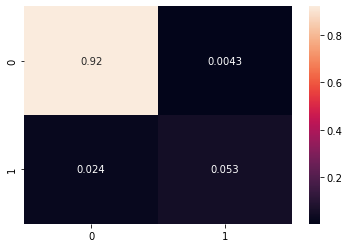

In [142]:
cmdataFrame = pd.DataFrame(cm/len(y_test))
sns.heatmap(cmdataFrame, annot = True)
plt.show()

As we can see from the confusion matrix above and the other metrics our model seems to have a high proportion of False negatives compared to False positives. Although we predict more frauds than we miss we would in a realistic scenario minimise the amount of False negatives as Falsely predicting Fraud has less of a negative impact than not detecting fraud. 

To do so we will adjust the threshold of the classification and produce both the false negative proportion as well as the accuracy of the model and then from this set the threshold.

#### Testing moving the threshold from 0.5 to 0.7:

In [143]:
predictionsAd = np.round(predicRaw + 0.2)

Proportion of correct predictions:  0.9704212518399102
Area under ROC curve:  0.8983875963251102
0.015630475923459734


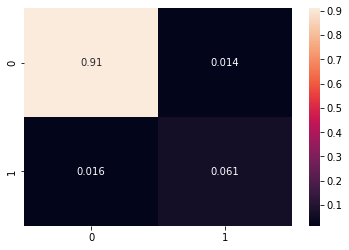

In [144]:
ac2 = accuracy_score(y_test,predictionsAd)
ro2 = roc_auc_score(predictionsAd,y_test)
cm2 = confusion_matrix(y_test, predictionsAd)

print("Proportion of correct predictions: ",ac2)
print("Area under ROC curve: ", ro2)
print(cm2[1,0]/len(y_test))

cmdataFrame = pd.DataFrame(cm2/len(y_test))
sns.heatmap(cmdataFrame, annot = True)
plt.show()

In [145]:
accAr = []

for i in range(0,1000):
    predic = np.round(predicRaw + (i-500)/1000)
    predicS = accuracy_score(y_test,predic)
    predicF = (confusion_matrix(y_test,predic)[1,0])/len(y_test)
    accAr.append([(predicS+(1-predicF))/2,(i-500)/1000])

accplot = pd.DataFrame(accAr , columns=["Acc","i"])

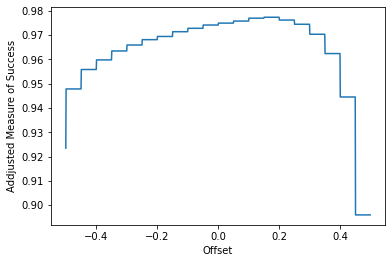

In [146]:
s= sns.lineplot(data=accplot, x="i", y="Acc",)
axesx = s.set_xlabel("Offset")
axesy = s.set_ylabel("Addjusted Measure of Success")

In [147]:
accplot.loc[accplot["Acc"].idxmax()]

Acc    0.977395
i      0.151000
Name: 651, dtype: float64

In [148]:
bestpred = np.round(predicRaw+ 0.101)

Proportion of correct predictions:  0.9717880423354595
Area under ROC curve:  0.9150121749474897


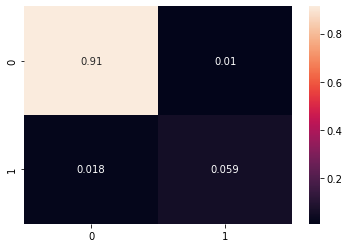

In [149]:
ac3 = accuracy_score(y_test,bestpred)
cm3 = confusion_matrix(y_test,bestpred)
ro3 = roc_auc_score(bestpred,y_test)

print("Proportion of correct predictions: ",ac3)
print("Area under ROC curve: ", ro3)

cmdataFrame = pd.DataFrame(cm3/len(y_test))
sns.heatmap(cmdataFrame, annot = True)
plt.show()

## Weighting the False Negatives and Accuracy

### Currently weighted : False negatives * 9, Accuracy * 1:

In [150]:
accAr2 = []

for i in range(0,1000):
    predic2 = np.round(predicRaw + (i-500)/1000)
    predicS2 = accuracy_score(y_test,predic2)
    predicF2 = (confusion_matrix(y_test,predic2)[1,0])/len(y_test)
    accAr2.append([(predicS2+(1-predicF2)*9)/10,(i-500)/1000])

accplot2 = pd.DataFrame(accAr2 , columns=["Acc","i"])

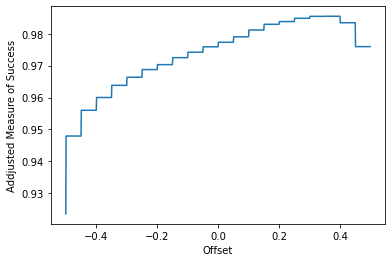

In [151]:
s= sns.lineplot(data=accplot2, x="i", y="Acc",)
axesx = s.set_xlabel("Offset")
axesy = s.set_ylabel("Addjusted Measure of Success")

In [152]:
accplot2.loc[accplot2["Acc"].idxmax()]

Acc    0.985505
i      0.351000
Name: 851, dtype: float64

In [153]:
bestpred2 = np.round(predicRaw+ 0.351)

Proportion of correct predictions:  0.9335880002803673
Area under ROC curve:  0.7651865484771242


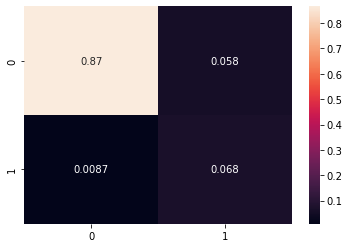

In [154]:
ac4 = accuracy_score(y_test,bestpred2)
cm4 = confusion_matrix(y_test,bestpred2)
ro4 = roc_auc_score(bestpred2,y_test)
print("Proportion of correct predictions: ",ac4)
print("Area under ROC curve: ", ro4)
cmdataFrame = pd.DataFrame(cm4/len(y_test))
sns.heatmap(cmdataFrame, annot = True)
plt.show()